# Lista de Exercícios 01 - PEL205

## Discuta o limite do efeito de aplicar repetidamente um filtro 3 x 3 passa-baixa em uma imagem digital.

Ao aplicar um filtro 3 x 3 passa-baixa repetidamente teremos uma suavização da imagem, porém após um determinado número de iterações não teremos mais diferenças significativas visto que a média tende a convergir. Através do exemplo abaixo podemos perceber que existe uma grande diferença entre a imagem original e a passagem do filtro 10 vezes, porém ao aumentarmos o número de iterações as diferenças passam a ser imperceptíveis.

In [1]:
! pip3 install tqdm

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


100%|██████████| 10000/10000 [00:04<00:00, 2188.48it/s]


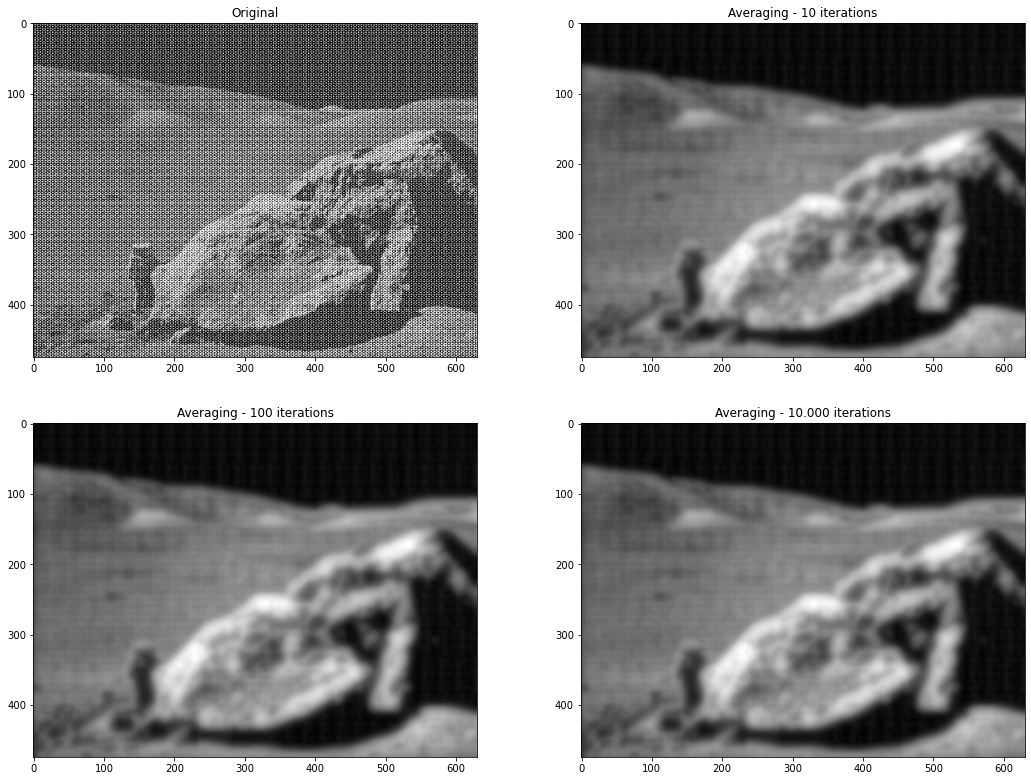

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

img = cv2.imread("../data/images/moonlanding.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3),np.float32) / 9
dst = img

for i in tqdm(range(10)):
    dst = cv2.filter2D(dst, -1, kernel)

dst = img
for i in tqdm(range(100)):
    dst = cv2.filter2D(dst, -1, kernel)

dst = img
for i in tqdm(range(10000)):
    dst = cv2.filter2D(dst, -1, kernel)


f = plt.figure(figsize=[18, 13.5])
f.add_subplot(2, 2, 1)
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.title('Original')
f.add_subplot(2, 2, 2)
plt.imshow(dst, cmap=plt.get_cmap("gray"))
plt.title('Averaging - 10 iterations')
f.add_subplot(2, 2, 3)
plt.imshow(dst, cmap=plt.get_cmap("gray"))
plt.title('Averaging - 100 iterations')
f.add_subplot(2, 2, 4)
plt.imshow(dst, cmap=plt.get_cmap("gray"))
plt.title('Averaging - 10.000 iterations')
plt.show()

## Considere uma imagem binária de tamanho N x N pixels que contem n x n quadrados de largura 1 pixel (tipo tabuleiro de xadrez) centralizado na imagem. O resto da imagem é parte do background onde todos os pixels são rotulados com o nível zero.

* Desenhe o histograma de direções calculados com o filtro Sobel;

* Desenhe o histograma do laplaciano.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import numpy as np
from tqdm import tqdm
import cv2 as cv

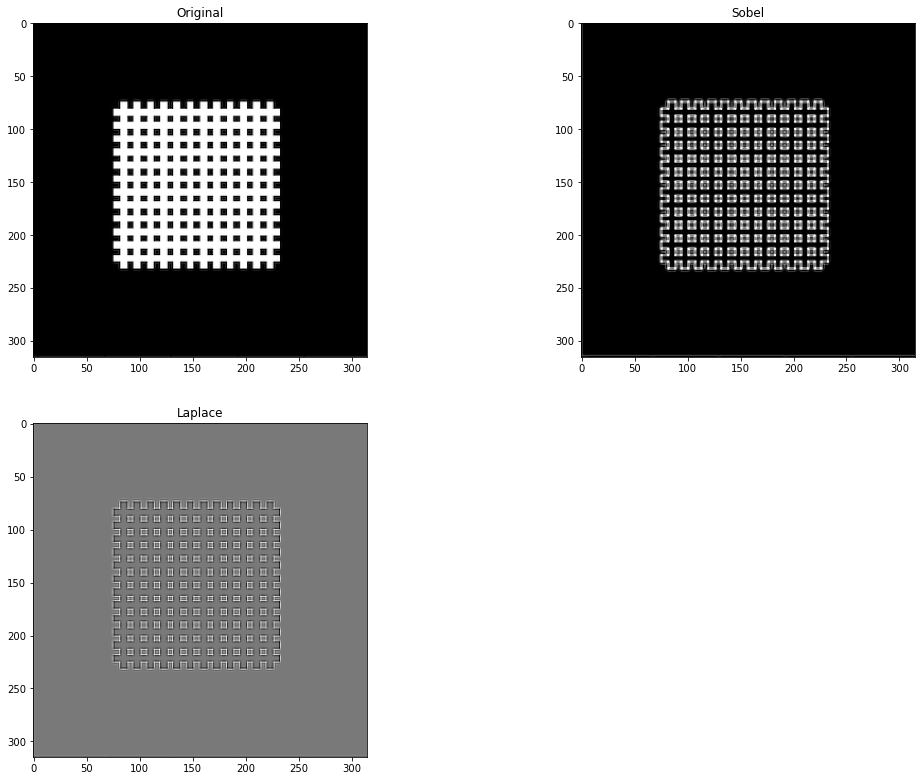

In [4]:
img = cv.imread("../data/images/bin_img.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(gray, cv.CV_16S, ksize=3)
abs_dst = cv.convertScaleAbs(laplacian)

sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv.convertScaleAbs(sobelx)
abs_grad_y = cv.convertScaleAbs(sobely)
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

f = plt.figure(figsize=[18, 13.5])
f.add_subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img, cmap=plt.get_cmap("gray"))
f.add_subplot(2, 2, 2)
plt.title("Sobel")
plt.imshow(grad, cmap=plt.get_cmap("gray"))
f.add_subplot(2, 2, 3)
plt.title("Laplace")
plt.imshow(laplacian, cmap=plt.get_cmap("gray"))

## Explique a perspectiva tradicional da disciplina de Visão Computacional, que se baseia em Visão de Baixo, Médio e Alto Nível, descrevendo sucintamente as principais técnicas relacionadas com cada etapa e como se aplicam.

Podemos dividir a área de Visão Computacional pode ser dividida em três categorias: baixo, médio e alto nível. Cada uma das categorias serve a um propósito muito específico conforme descrito abaixo:

1. Nível Baixo

É utilizado para melhorar a aparência das imagens ou realçar partes e características desejadas para a análise em questão. É nesta categoria que faríamos a remoção de ruídos de uma imagem. As principais técnicas são: filtros (gaussiano, média, mediana, etc), 

2. Nível Médio

Neste nível é feito o reconhecimento de formas primitivas como por exemplo curvas, retas, polígonos, etc. Porém, neste nível as formas e regiões não fazem sentido isoladas. Principais técnicas: extração de regiões, reconhecimento de formas geométricas primitivas.

3. Nível Alto

Neste nível as regiões passam a fazer sentido e torna-se possível fazer a inferência de informações para interpretação de objetos e cenas. Principais técnicas: inferência baseada em contexto, inferência de jogadores em quadra.

## Utilizando uma imagem em tons de cinza a sua escolha:

* Calcular o espectro de Fourier;
* Podar as altas freqüências;
* Podar as baixas freqüências;
* Aplicar o filtro da média;
* Aplicar o filtro da mediana;
* Aplicar o filtro Sobel;
* Calcular a direção do gradiente em cada ponto;
* Calcular o valor absoluto do gradiente em cada ponto;
* Criar um filtro gaussiano e suavizar;

In [5]:
import numpy as np
from scipy import fftpack
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm import tqdm
import math
import cv2 as cv

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def remove_freq(img_hf, t, high):
    lin, col = img_hf.shape
    xc = col/2
    yc = lin/2
    im_fft2 = img_hf.copy()
    
    for y in tqdm(range(lin)):
        for x in range(col):
            r = math.sqrt((x - xc)**2 + (y - yc)**2)
            
            if high:
                if r < t:
                    im_fft2[y][x] = img_hf[y][x]
                else:
                    im_fft2[y][x] = 0
            else:
                if r > t:
                    im_fft2[y][x] = img_hf[y][x]
                else:
                    im_fft2[y][x] = 0
    
    return im_fft2

img = cv.imread("../data/images/moonlanding.png")
img_bw = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [6]:
# Fourier
img_fft = fftpack.fft2(img_bw)
fft_high_removed = remove_freq(img_fft, 1075, 1)
img_fft_high_removed = fftpack.ifft2(fft_high_removed).real
fft_low_removed = remove_freq(img_fft, 100, 0)
img_fft_low_removed = fftpack.ifft2(fft_low_removed).real

100%|██████████| 474/474 [00:00<00:00, 1521.45it/s]


In [7]:
# Media
media = cv.blur(img_bw, (10, 10))
# Mediana
mediana = cv.medianBlur(img_bw, 5)

In [8]:
sobelx = cv.Sobel(img_bw, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(img_bw, cv.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv.convertScaleAbs(sobelx)
abs_grad_y = cv.convertScaleAbs(sobely)
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
print("Valor absoluto do gradiente em cada ponto:\n", grad)

Valor absoluto do gradiente em cada ponto:
 [[  0 128 128 ...  28 110   0]
 [128 255 255 ... 167 241 128]
 [128  30 255 ... 150 152  50]
 ...
 [128 255 178 ... 210 204 128]
 [128 173 255 ... 255 255 128]
 [  0 128  56 ... 128 128   0]]


In [9]:
gaussian = cv.GaussianBlur(img_bw,(5,5),0)

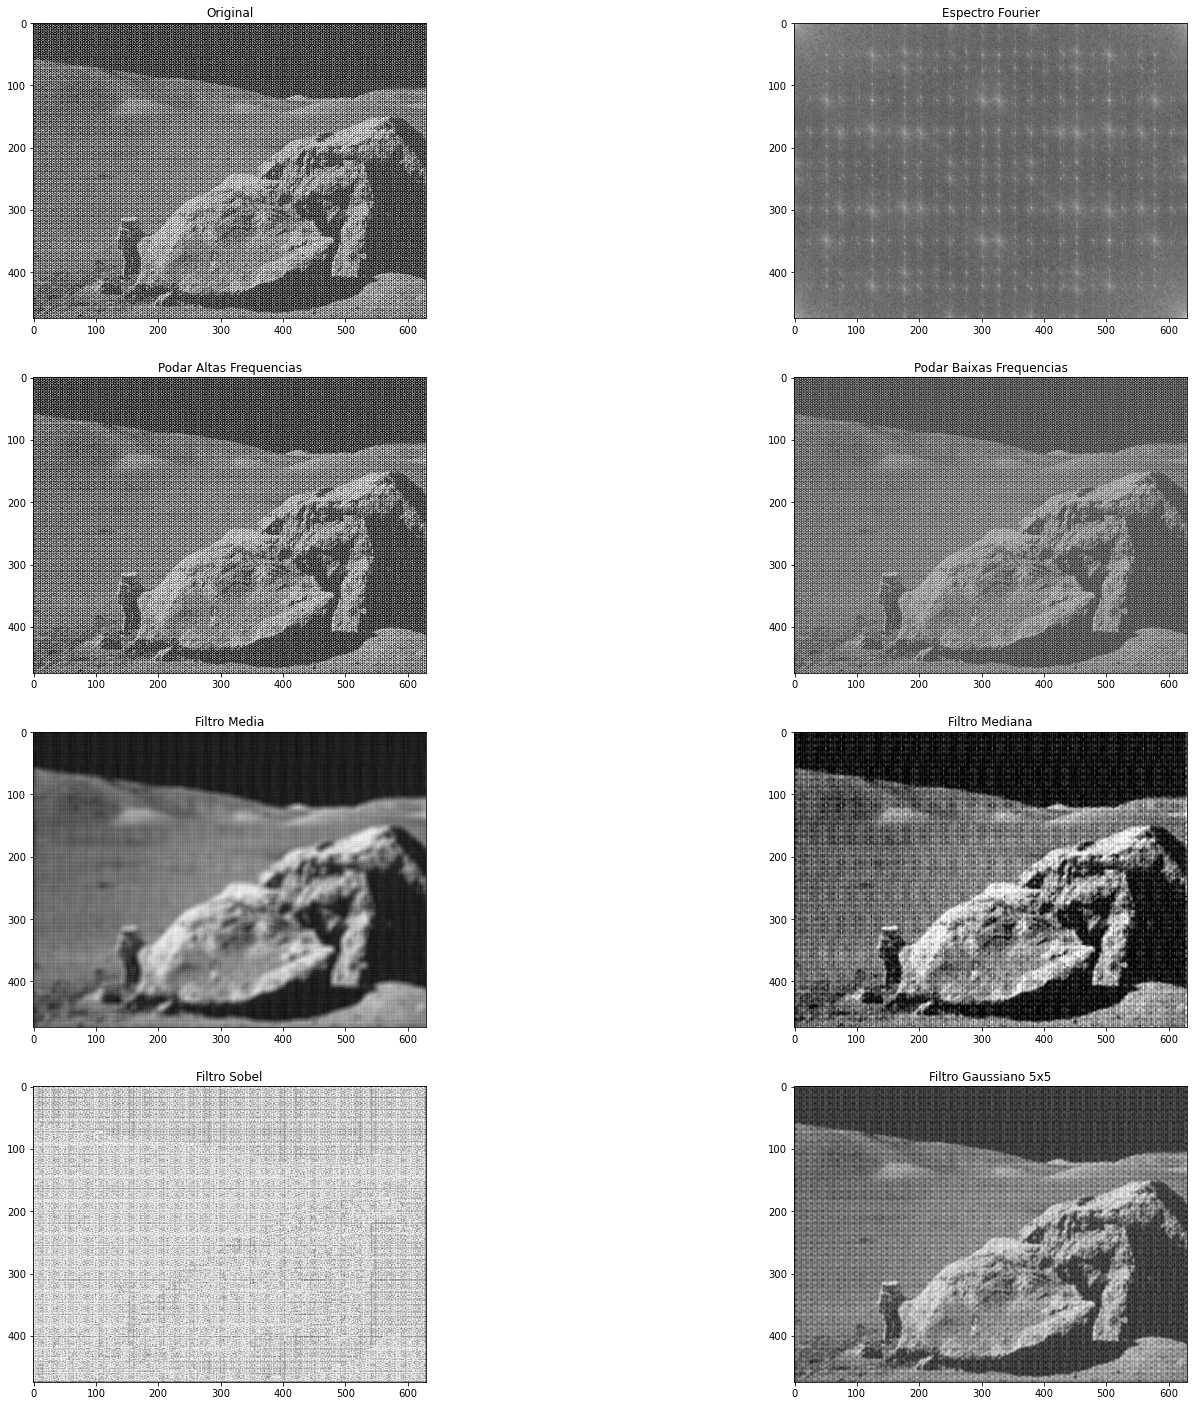

In [10]:
f = plt.figure(figsize=[25, 25])
f.add_subplot(4, 2, 1)
plt.title("Original")
plt.imshow(img_bw, cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 2)
plt.title("Espectro Fourier")
plt.imshow(np.abs(img_fft), norm=LogNorm(), cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 3)
plt.title("Podar Altas Frequencias")
plt.imshow(img_fft_high_removed, cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 4)
plt.title("Podar Baixas Frequencias")
plt.imshow(img_fft_low_removed, cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 5)
plt.title("Filtro Media")
plt.imshow(media, cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 6)
plt.title("Filtro Mediana")
plt.imshow(mediana, cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 7)
plt.title("Filtro Sobel")
plt.imshow(grad, cmap=plt.get_cmap("gray"))
f.add_subplot(4, 2, 8)
plt.title("Filtro Gaussiano 5x5")
plt.imshow(gaussian, cmap=plt.get_cmap("gray"))
plt.show()